# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>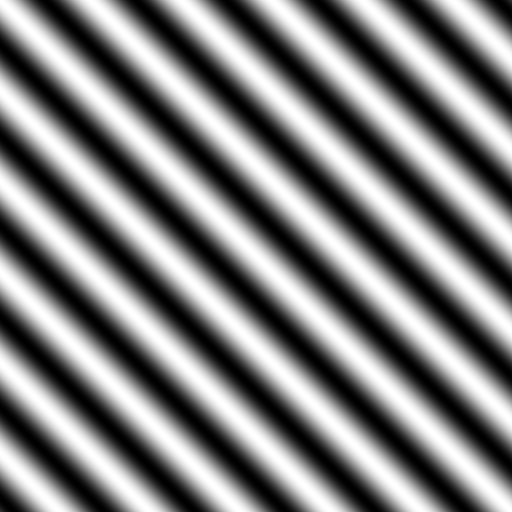</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.


In [142]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
# %matplotlib notebook 
%matplotlib inline 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(4,4))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(4,4))
    if title: plt.title(title)
    ax = plt.subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()    
    
    
    
def computeFT(I):
    return fft2(I)

def toVisualizeFT(If):
    return fftshift(np.abs(If))

def toVisualizeLogFT(If):
    return np.log( 1 + np.abs(If))

def display(fs,A,theta,L,T0,verbose=True): 
    Ts = 1/fs
    signal_sampled = sinusoid2d(A, theta, L, T0, Ts)
    if(verbose):
        imshow(signal_sampled)
        plt.show()

    ft_signal_sampled = toVisualizeFT(computeFT(signal_sampled))
    surf(ft_signal_sampled)
    plt.show()

1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows to sample signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.


In [143]:
A = 1
theta = 45
L = 512
T0 = 64
TS = 1

signal_45  = sinusoid2d(A,theta, L, T0,TS)

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

- Fmax_t est la frequence maximal du signal projeté sur l'axe t
- Fmax_u est la frequence maximal du signal projeté sur l'axe u
- Fm peut etre utilisé pour deriver la frequence limite du signal echantillionné car ce signal est band-limited(cos) autrement dit tous les modules des frequences superieurs a |Fm| sont nulles .

In [144]:
f0 = 1 / T0
f_mu = np.cos(np.deg2rad(theta)) * f0
f_mt = np.sin(np.deg2rad(theta)) * f0

fm = max(f_mu, f_mt)
print("La Frequence maximale Fm est  : ",fm)

La Frequence maximale Fm est  :  0.011048543456039806


2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.
2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

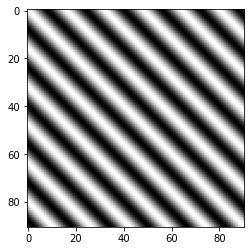

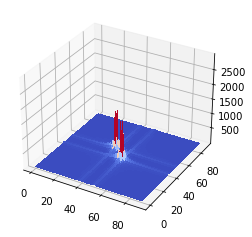

In [145]:
fs = 16 * fm
display(fs,A,theta,L,T0)

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

- Le spectre produit est effectivement la transformée de fourier d'une fonction sinoisidale ( deux dirac )
- En diminuant Ts ( en augmentant Fs ) les deux peaks de dirac se separent encore plus car entre eux y'a une valeur de '2*Fs' qui peut etre une fonction croissante en Fs. 
- Le spectre du signal initial à deux peaks de distance (2Fm) entre eux.
- La difference entre le spectre du signal original et celui echantillonné est que ce dernier est une periodisation du spectre original sur une periode de Fs . 
- Bonus :
 - Les petits lobes qui apparaissent au bord des deux peaks de dirac sont à l'origine du sinus cardinal (sinc) qui est le spectre d'un signal sous forme de dirac , ainsi on deduit qu'on peut approcher un signal rectangulaire via un signal sous forme de sinc.
 - Pour un T0 grand : par exemple (T0 = 200 , F0 = 0.005 , Fs = 20 pour des raisons d'affichage ) la frequence du spectre sera tres petite au point que le dirac 1 va se superposer sur le dirac 2 . Cela se traduit par un signal qui tend vers une constante et son spectre lui va tendre va un unique dirac centré à la frequence maximal du signal.


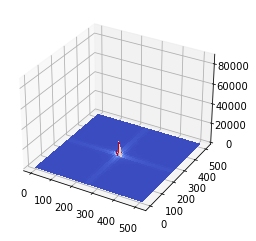

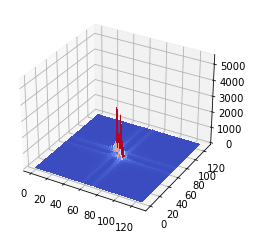

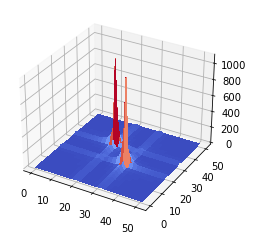

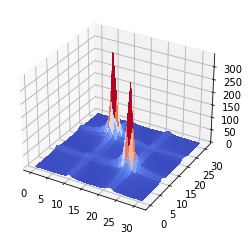

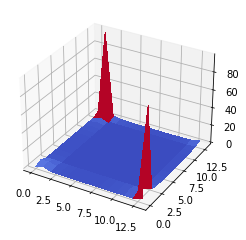

In [146]:
# valeurs aleatoires de Ts
Ts_s = [1,4,10,16,39]
for ts in Ts_s:
    signal_sampled = sinusoid2d(A, theta, L, T0, ts)
    ft_signal_sampled = toVisualizeFT(computeFT(signal_sampled))
    surf(ft_signal_sampled)

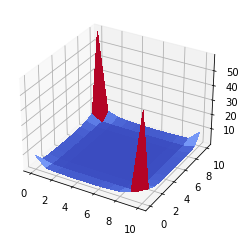

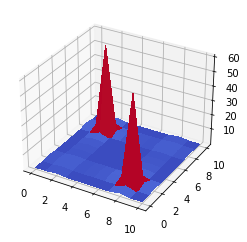

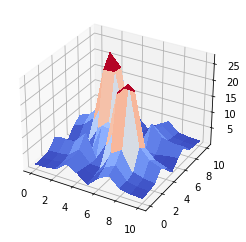

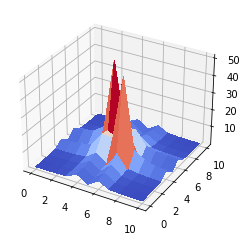

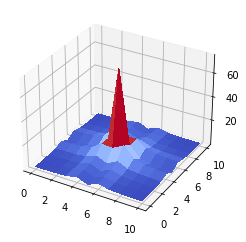

In [147]:
Ts = 50
T0_s = [64 , 128 , 256 , 512 , 1024]
for t0 in T0_s:
    signal_sampled = sinusoid2d(A, theta, L, t0, Ts)
    ft_signal_sampled = toVisualizeFT(computeFT(signal_sampled))
    surf(ft_signal_sampled)

3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

64


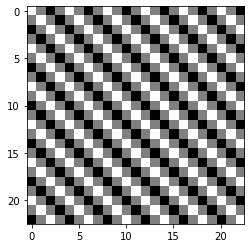

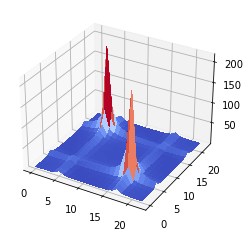

In [148]:
fs = 4 * fm
print(T0)
display(fs,A,theta,L,T0)

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [149]:
def error(signal, signal_r):
    return np.abs((signal_r - signal).sum()) / (2*A*np.power(L,2))

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

Frequence d'echantillionage - Fs :  0.04419417382415922
2 * Frequence maximale - 2*Fm :  0.02209708691207961


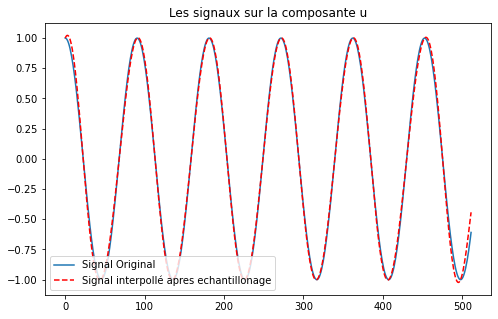

L'erreur moyenne entre le signal original et celui reconstruit à partir du signal echantilionné est 
 6.0466821177509584e-05


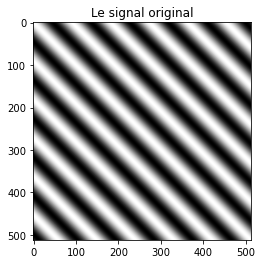

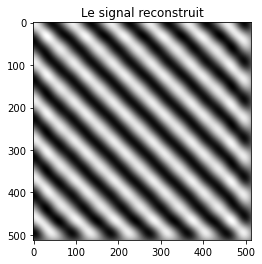

In [150]:
TS = 1/fs
print("Frequence d'echantillionage - Fs : " , fs)
print("2 * Frequence maximale - 2*Fm : ",2*fm)
signal_s = sinusoid2d(A, theta, L, T0, TS)
signal_r = shannonInterpolation(signal_s, TS, L)

plt.figure(figsize=(8,5))

plt.plot(signal_45[:,0],label="Signal Original")

plt.plot(signal_r[:,0],'--r',label="Signal interpollé apres echantillonage")

plt.legend(loc ="lower left")
plt.title("Les signaux sur la composante u")
plt.show()


print("L'erreur moyenne entre le signal original et celui reconstruit à partir du signal echantilionné est \n",error(signal_45,signal_r))

imshow(signal_45,"Le signal original")

imshow(signal_r,"Le signal reconstruit")


- On remarque qu'on evite le cas d'aliasing vuque la condiion de shannon est verifée : Fs > 2Fm.
- A l'oeil nu , les deux signaux semblent 'identiques' .
- L'erreur est petite , on peut deduire que la periode d'echantillonage choisie etait 'bonne' pour pouvoir reconstituer le signal d'origine.
- cette erreur vient du faite que pour reconstituer le signal à partir du signal echantillonné il suffisait de fenetrer en faisant Rect(f) pour un N sur le spectre periodique du signal echantillonné  . Cela est suffisant pour le reconstituer mais en revanche il laisse passer quelques pertes d'informations minimes ; sans ces dernieres le signal reconstitué serra identique au signal originale.

- A noter que faire augmenter la periode d'echantillonage (Fs) baissera l'erreur moyenne des deux signaux , mais il y'a un compromis à faire  : perdre un peu en precision de reconsitution en maintenant le (Fs) pas tres grand OU pouvoir stocker pleins d'echantillions sur le signal originale en prenant un (Fs) tres grand qui va faire tendre l'erreur moyenne vers 0. 

4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.

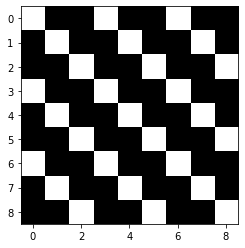

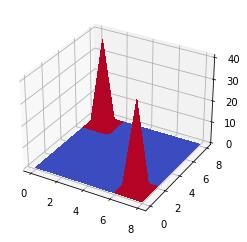

In [151]:
fs = (3/2) * fm
display(fs,A,theta,L,T0)

Frequence d'echantillionage - Fs :  0.01657281518405971
2 * Frequence maximale - 2*Fm :  0.02209708691207961


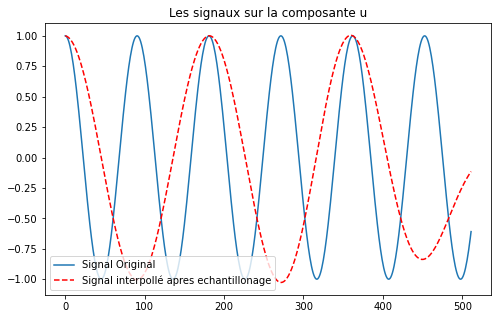

L'erreur moyenne entre le signal original et celui reconstruit à partir du signal echantilionné est 
 0.0005406737936073272


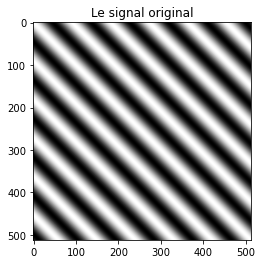

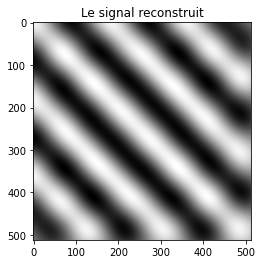

In [152]:
TS = 1/fs
print("Frequence d'echantillionage - Fs : " , fs)
print("2 * Frequence maximale - 2*Fm : ",2*fm)
signal_s = sinusoid2d(A, theta, L, T0, TS)
signal_r = shannonInterpolation(signal_s, TS, L)


plt.figure(figsize=(8,5))

plt.plot(signal_45[:,0],label="Signal Original")

plt.plot(signal_r[:,0],'--r',label="Signal interpollé apres echantillonage")

plt.legend(loc ="lower left")
plt.title("Les signaux sur la composante u")
plt.show()

print("L'erreur moyenne entre le signal original et celui reconstruit à partir du signal echantilionné est \n",error(signal_45,signal_r))

imshow(signal_45,"Le signal original")

imshow(signal_r,"Le signal reconstruit")

- On remarque qu'on est dans un cas d'aliasing vuque la condition de shannon n'est pas verifée : Fs < 2Fm.
- Cela veut dire que dans le spectre du signal echantillonné il y'aura des parties qui vont se chevaucher ainsi en fenetrant avec Rect on va pas obtenir le spectre ce qui va nous mener vers une interpolation du signal 'pas tres exacte'.
- A l'oeil nu , le signal interpollé semble un peu loin quand meme du signal originale.
- On remarque aussi que l'erreur moyenne a augmenté d'avantage .

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

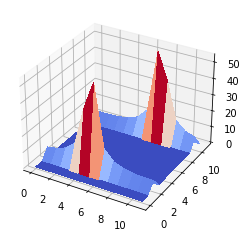

Frequence d'echantillionage - Fs :  0.023081431711223625
2 * Frequence maximale - 2*Fm :  0.0307752422816315
L'erreur moyenne entre le signal original et celui reconstruit à partir du signal echantilionné est 
 0.002242008739910809


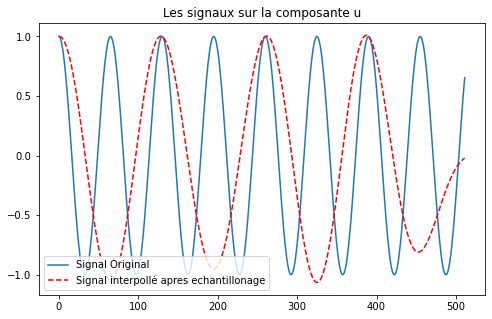

In [153]:
theta_bis = 10
A = 1
L = 512
T0 = 64
TS = 1
signal_10  = sinusoid2d(A,theta_bis, L,T0,TS)


f0 = 1 / T0
f_mu = np.cos(np.deg2rad(theta_bis)) * f0
f_mt = np.sin(np.deg2rad(theta_bis)) * f0

fm = max(f_mu, f_mt)

fs = (3/2) * fm
TS = 1/fs


display(fs,A,theta_bis,L,T0,False)

print("Frequence d'echantillionage - Fs : " , fs)
print("2 * Frequence maximale - 2*Fm : ",2*fm)
signal_s = sinusoid2d(A, theta_bis, L, T0, TS)
signal_r = shannonInterpolation(signal_s, TS, L)
print("L'erreur moyenne entre le signal original et celui reconstruit à partir du signal echantilionné est \n",error(signal_10, signal_r))


plt.figure(figsize=(8,5))

plt.plot(signal_10[:,0],label="Signal Original")

plt.plot(signal_r[:,0],'--r',label="Signal interpollé apres echantillonage")

plt.legend(loc ="lower left")
plt.title("Les signaux sur la composante u")
plt.show()

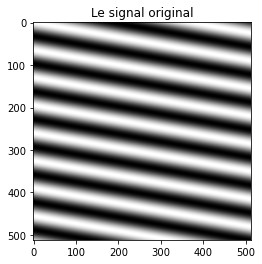

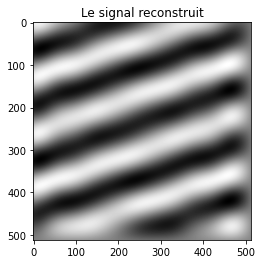

In [154]:
imshow(signal_10,"Le signal original")

imshow(signal_r,"Le signal reconstruit")

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [155]:
from time import process_time
mytime = 0

def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
    
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

# def shannonInterpolationLoop(I,Ts,size):
#     xr = []
#     fs = 1/Ts
#     n, m = I.shape
#     xt, yt = np.meshgrid(np.arange(0, size), np.arange(0, n))
#     xu, yu = np.meshgrid(np.arange(0, size), np.arange(0, m))
#     for k in range(I.shape[0]):
#         for l in range(I.shape[1]):
#             xr.append(xt[k*Ts][l*Ts] * np.sinc(np.pi*fs*(yt - k*Ts)) *  np.sinc(np.pi*fs*(yu - k*Ts))) 
            
#     return xr


## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

In [156]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    return I[::2,::2]

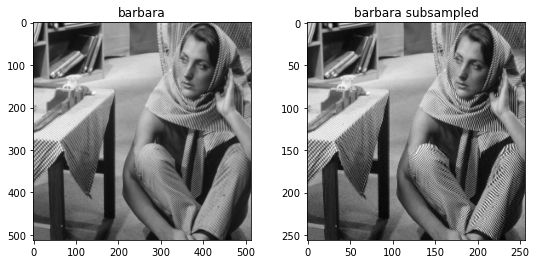

In [157]:
plt.figure(figsize=(9,4))

plt.subplot(121)
plt.title("barbara")
plt.imshow(barbara)

plt.subplot(122)
plt.title("barbara subsampled")
plt.imshow(subSample2(barbara))


1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

- Le sous-echantillonage de facteur 2 selectionnera un pixel sur deux dans l'image originale. Ainsi la dimension de l'image sous-echantillonnée sera la dimension de l'image originale / 2 . 



2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

- Sous-echantillonner une image est une reduction de pixels sur l'image et une reduction frequentielle dans le domaine spectrale ce qui induit vers une reconstitution parielle du spectre d'ou le manque de netteté sur l'image . 

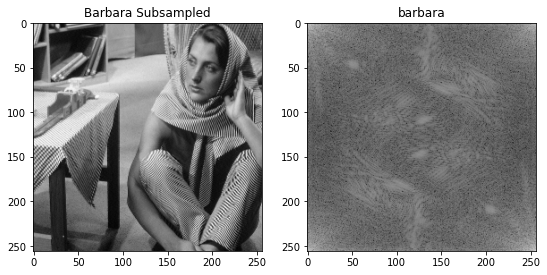

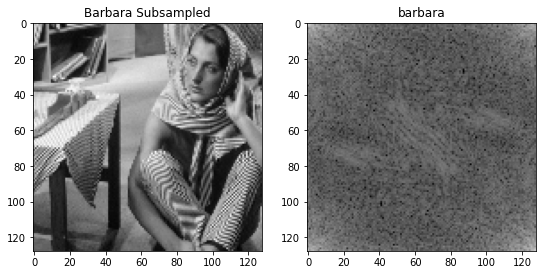

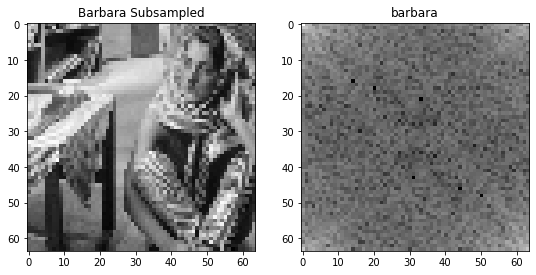

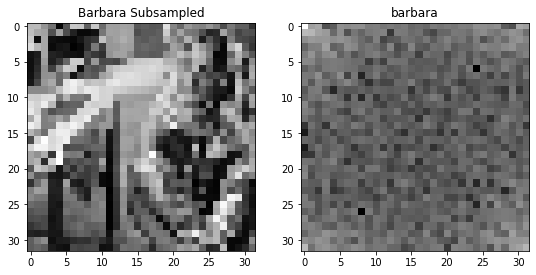

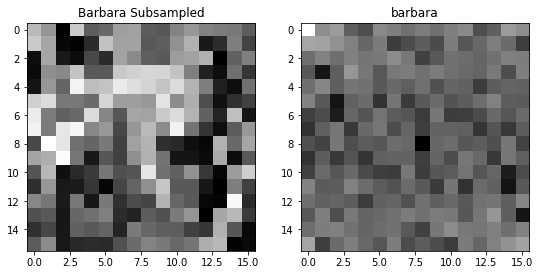

In [158]:
for i in range(5):
    plt.figure(figsize=(9,5))

    barbara_s = subSample2(barbara)
    
    plt.subplot(121)
    plt.title("Barbara Subsampled")
    plt.imshow(barbara_s)
    
    plt.subplot(122)
    plt.title("barbara")
    plt.imshow(toVisualizeLogFT(computeFT(barbara_s)))
    
    plt.show()
        
    barbara = barbara_s

3. Bonus question: same question with the image `img/mandrill.png`.

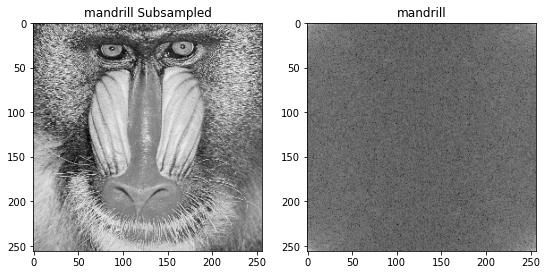

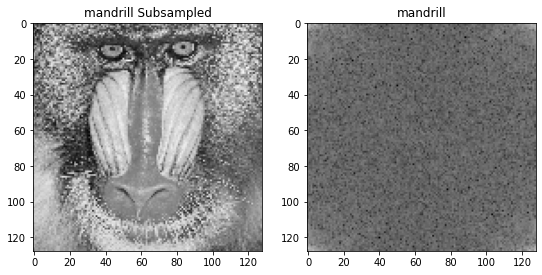

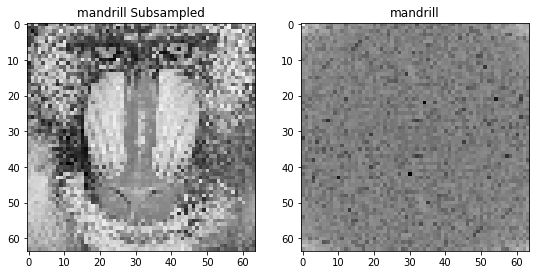

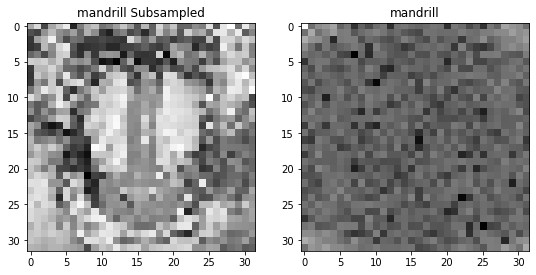

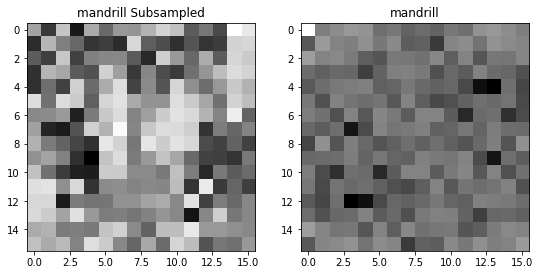

In [159]:
mandrill = np.array(Image.open('img/mandrill.png'))

for i in range(5):
    plt.figure(figsize=(9,5))

    mandrill_s = subSample2(mandrill)
    
    plt.subplot(121)
    plt.title("mandrill Subsampled")
    plt.imshow(mandrill_s)
    
    plt.subplot(122)
    plt.title("mandrill")
    plt.imshow(toVisualizeLogFT(computeFT(mandrill_s)))
    
    plt.show()
        
    mandrill = mandrill_s